<a href="https://colab.research.google.com/github/np03cs4a240231-netizen/Final_Assessment_AI/blob/main/2501416_Pranjal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Mortality - Race/Ethnicity Classification Task
## Final Portfolio Project

**Student Name:** Pranjal Khanal  
**University ID:** 2501416  
**Group:** L5CG2  

**Date:** 10th February 2026

---



---
## Connection to UN Sustainable Development Goals

### SDG 3: Good Health and Well-being
This classification task supports **SDG 3: Good Health and Well-being** by:
- Understanding health disparities across different racial and ethnic groups
- Identifying patterns in cardiovascular health outcomes among various demographics
- Enabling targeted public health interventions for specific communities
- Supporting evidence-based healthcare policy development

### SDG 10: Reduced Inequalities
This analysis directly contributes to **SDG 10: Reduced Inequalities** by:
- Examining mortality data across different racial and ethnic groups
- Revealing health inequities in cardiovascular health outcomes
- Providing insights that can inform policies to reduce health disparities
- Highlighting populations that may require additional healthcare resources
- Supporting the goal of ensuring equal opportunity and reducing inequalities

By understanding these patterns, public health officials can develop more equitable healthcare interventions and address systemic health disparities.

---
## Step 1: Mount Google Drive and Import Libraries

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")

Mounted at /content/drive
✓ Google Drive mounted successfully!


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# TensorFlow/Keras for Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

All libraries imported successfully!
TensorFlow version: 2.19.0


---
## Step 2: Load Dataset

In [3]:
# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Ai/FinalAssessment/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2018-2020 (1).csv'

print("Loading dataset...")
df_original = pd.read_csv(file_path)

print(f"✓ Dataset loaded successfully!")
print(f"Shape: {df_original.shape}")
print(f"\nFirst few rows:")
df_original.head()

Loading dataset...
✓ Dataset loaded successfully!
Shape: (59094, 20)

First few rows:


,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2019,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,182.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2019,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2019,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,255.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2019,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,343.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Sex,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2019,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Sex,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


---
## Step 3: Initial Data Exploration

In [4]:
# Dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df_original.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59094 non-null  int64  
 1   LocationAbbr                59094 non-null  object 
 2   LocationDesc                59094 non-null  object 
 3   GeographicLevel             59094 non-null  object 
 4   DataSource                  59094 non-null  object 
 5   Class                       59094 non-null  object 
 6   Topic                       59094 non-null  object 
 7   Data_Value                  33087 non-null  float64
 8   Data_Value_Unit             59094 non-null  object 
 9   Data_Value_Type             59094 non-null  object 
 10  Data_Value_Footnote_Symbol  26007 non-null  object 
 11  Data_Value_Footnote         26007 non-null  object 
 12  StratificationCategory1     59094 non-null  object 
 13  Stratificat

In [5]:
# CRITICAL: Global scan focusing on classification target
print("=" * 80)
print("TARGET VARIABLE ANALYSIS: STRATIFICATION2 (RACE/ETHNICITY)")
print("=" * 80)

print(f"\nStratification2 (Race/Ethnicity) Distribution:")
print(df_original['Stratification2'].value_counts())
print(f"\nUnique values: {df_original['Stratification2'].unique()}")

print("\n" + "=" * 80)
print("OTHER KEY COLUMNS")
print("=" * 80)

print(f"\nStratification1 (Sex):")
print(df_original['Stratification1'].value_counts())

print(f"\nData_Value statistics:")
print(df_original['Data_Value'].describe())

TARGET VARIABLE ANALYSIS: STRATIFICATION2 (RACE/ETHNICITY)

Stratification2 (Race/Ethnicity) Distribution:
Stratification2
Overall                               9849
White                                 9849
Asian and Pacific Islander            9849
Black                                 9849
Hispanic                              9849
American Indian and Alaskan Native    9849
Name: count, dtype: int64

Unique values: ['Overall' 'White' 'Asian and Pacific Islander' 'Black' 'Hispanic'
 'American Indian and Alaskan Native']

OTHER KEY COLUMNS

Stratification1 (Sex):
Stratification1
Overall    19698
Male       19698
Female     19698
Name: count, dtype: int64

Data_Value statistics:
count    33087.000000
mean       344.060571
std        148.004264
min          0.000000
25%        241.800000
50%        329.100000
75%        428.900000
max       2312.100000
Name: Data_Value, dtype: float64


---
## Step 4: Data Preprocessing - Critical Filtering Steps

### 4.1 Filter Out 'Overall' Categories

In [6]:
# MANDATORY FILTERING: Remove 'Overall' categories
print("=" * 80)
print("FILTERING OUT 'OVERALL' CATEGORIES")
print("=" * 80)

print(f"\nOriginal dataset shape: {df_original.shape}")
print(f"Stratification1 (Sex) - 'Overall' count: {(df_original['Stratification1'] == 'Overall').sum()}")
print(f"Stratification2 (Race/Ethnicity) - 'Overall' count: {(df_original['Stratification2'] == 'Overall').sum()}")

# Apply filter
df_filtered = df_original[
    (df_original['Stratification1'] != 'Overall') &
    (df_original['Stratification2'] != 'Overall')
].copy()

print(f"\nAfter filtering shape: {df_filtered.shape}")
print(f"Rows removed: {df_original.shape[0] - df_filtered.shape[0]}")

print(f"\n✓ Verification:")
print(f"Stratification1 unique values: {df_filtered['Stratification1'].unique()}")
print(f"Stratification2 unique values: {df_filtered['Stratification2'].unique()}")

# Check class distribution after filtering
print(f"\nClass Distribution (Target Variable):")
print(df_filtered['Stratification2'].value_counts())

FILTERING OUT 'OVERALL' CATEGORIES

Original dataset shape: (59094, 20)
Stratification1 (Sex) - 'Overall' count: 19698
Stratification2 (Race/Ethnicity) - 'Overall' count: 9849

After filtering shape: (32830, 20)
Rows removed: 26264

✓ Verification:
Stratification1 unique values: ['Male' 'Female']
Stratification2 unique values: ['White' 'Asian and Pacific Islander' 'Black' 'Hispanic'
 'American Indian and Alaskan Native']

Class Distribution (Target Variable):
Stratification2
White                                 6566
Asian and Pacific Islander            6566
Black                                 6566
Hispanic                              6566
American Indian and Alaskan Native    6566
Name: count, dtype: int64


### 4.2 Handle Suppressed Data ('~' Symbol)

In [7]:
# MANDATORY: Clean Data_Value column
print("=" * 80)
print("HANDLING SUPPRESSED DATA ('~' SYMBOLS)")
print("=" * 80)

print(f"\nBefore cleaning:")
print(f"Data type: {df_filtered['Data_Value'].dtype}")
tilde_count = df_filtered['Data_Value'].astype(str).str.contains('~', na=False).sum()
print(f"Rows containing '~' symbol: {tilde_count}")

# Convert to numeric (converts '~' to NaN)
df_filtered['Data_Value'] = pd.to_numeric(df_filtered['Data_Value'], errors='coerce')

# Drop rows with NaN in Data_Value
df_clean = df_filtered.dropna(subset=['Data_Value']).copy()

print(f"\nAfter cleaning:")
print(f"Data type: {df_clean['Data_Value'].dtype}")
print(f"Shape: {df_clean.shape}")
print(f"Rows removed: {df_filtered.shape[0] - df_clean.shape[0]}")
print(f"\n✓ Data_Value is now numeric and clean!")

HANDLING SUPPRESSED DATA ('~' SYMBOLS)

Before cleaning:
Data type: float64
Rows containing '~' symbol: 0

After cleaning:
Data type: float64
Shape: (14554, 20)
Rows removed: 18276

✓ Data_Value is now numeric and clean!


### 4.3 Extract Year as Numeric Feature

In [8]:
# PROPOSAL REQUIREMENT: Extract Year
print("=" * 80)
print("EXTRACTING YEAR AS NUMERIC FEATURE")
print("=" * 80)

print(f"\nYear column data type: {df_clean['Year'].dtype}")
print(f"Unique years: {sorted(df_clean['Year'].unique())}")
print(f"Year value counts:")
print(df_clean['Year'].value_counts().sort_index())

print(f"\n✓ Year is already a numeric feature!")

EXTRACTING YEAR AS NUMERIC FEATURE

Year column data type: int64
Unique years: [np.int64(2019)]
Year value counts:
Year
2019    14554
Name: count, dtype: int64

✓ Year is already a numeric feature!


### 4.4 Create Regional Groupings

In [9]:
# PROPOSAL REQUIREMENT: Create Regional Groupings
print("=" * 80)
print("CREATING REGIONAL GROUPINGS")
print("=" * 80)

# Define regional mappings based on US Census Bureau regions
region_mapping = {
    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South',
    'GA': 'South', 'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South',
    'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South',
    'VA': 'South', 'WV': 'South',

    # Midwest
    'IA': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest',
    'NE': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # Northeast
    'CT': 'Northeast', 'MA': 'Northeast', 'ME': 'Northeast', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast',
    'VT': 'Northeast',

    # Territories
    'AS': 'Territory', 'GU': 'Territory', 'MP': 'Territory', 'PR': 'Territory',
    'VI': 'Territory', 'UM': 'Territory'
}

# Create Region column
df_clean['Region'] = df_clean['LocationAbbr'].map(region_mapping)

# Handle any unmapped states
unmapped = df_clean[df_clean['Region'].isna()]['LocationAbbr'].unique()
if len(unmapped) > 0:
    print(f"\nWarning: Unmapped states/territories: {unmapped}")
    df_clean['Region'].fillna('Other', inplace=True)

print(f"\nRegional Distribution:")
print(df_clean['Region'].value_counts())

print(f"\n✓ Regional groupings created successfully!")

CREATING REGIONAL GROUPINGS


Regional Distribution:
Region
South        7052
Midwest      3716
West         2480
Northeast    1296
Other          10
Name: count, dtype: int64

✓ Regional groupings created successfully!


### 4.5 Select and Prepare Features

In [10]:
# Select relevant features for classification
print("=" * 80)
print("SELECTING FEATURES FOR CLASSIFICATION TASK")
print("=" * 80)

# Features for classification
selected_features = [
    'Year',                    # Temporal factor
    'LocationDesc',            # County location
    'LocationAbbr',            # State abbreviation
    'Region',                  # Regional grouping (created)
    'Stratification1',         # Sex (Male/Female)
    'Data_Value',              # Mortality rate (feature)
    'Stratification2'          # TARGET: Race/Ethnicity
]

df_work = df_clean[selected_features].copy()

# Rename for clarity
df_work.columns = ['Year', 'County', 'State', 'Region', 'Sex', 'Mortality_Rate', 'Race_Ethnicity']

print(f"\nWorking dataset shape: {df_work.shape}")
print(f"\nColumn names:")
for i, col in enumerate(df_work.columns, 1):
    print(f"  {i}. {col}")

print(f"\nTarget variable (Race_Ethnicity) distribution:")
print(df_work['Race_Ethnicity'].value_counts())

print(f"\nFirst few rows:")
df_work.head(10)

SELECTING FEATURES FOR CLASSIFICATION TASK

Working dataset shape: (14554, 7)

Column names:
  1. Year
  2. County
  3. State
  4. Region
  5. Sex
  6. Mortality_Rate
  7. Race_Ethnicity

Target variable (Race_Ethnicity) distribution:
Race_Ethnicity
White                                 6359
Black                                 3585
Hispanic                              2403
Asian and Pacific Islander            1387
American Indian and Alaskan Native     820
Name: count, dtype: int64

First few rows:


,Year,County,State,Region,Sex,Mortality_Rate,Race_Ethnicity
118,2019,Anchorage,AK,West,Male,302.0,White
119,2019,Bethel,AK,West,Male,281.6,White
121,2019,Denali,AK,West,Male,272.0,White
123,2019,Fairbanks North Star,AK,West,Male,316.4,White
124,2019,Haines,AK,West,Male,296.5,White
125,2019,Hoonah-Angoon,AK,West,Male,279.3,White
126,2019,Juneau,AK,West,Male,297.1,White
127,2019,Kenai Peninsula,AK,West,Male,309.3,White
128,2019,Ketchikan Gateway,AK,West,Male,360.3,White
129,2019,Kodiak Island,AK,West,Male,334.3,White


In [11]:
# Check for missing values
print("Checking for missing values:")
print(df_work.isnull().sum())

# Drop any remaining missing values
df_work = df_work.dropna()
print(f"\nFinal working dataset shape: {df_work.shape}")

Checking for missing values:
Year              0
County            0
State             0
Region            0
Sex               0
Mortality_Rate    0
Race_Ethnicity    0
dtype: int64

Final working dataset shape: (14554, 7)


### 4.6 Encode Categorical Variables

In [12]:
# Encode categorical variables
print("=" * 80)
print("ENCODING CATEGORICAL VARIABLES")
print("=" * 80)

df_encoded = df_work.copy()

# Initialize LabelEncoders
le_county = LabelEncoder()
le_state = LabelEncoder()
le_region = LabelEncoder()
le_sex = LabelEncoder()
le_race = LabelEncoder()

# Encode each categorical variable
df_encoded['County_Encoded'] = le_county.fit_transform(df_encoded['County'])
df_encoded['State_Encoded'] = le_state.fit_transform(df_encoded['State'])
df_encoded['Region_Encoded'] = le_region.fit_transform(df_encoded['Region'])
df_encoded['Sex_Encoded'] = le_sex.fit_transform(df_encoded['Sex'])
df_encoded['Race_Encoded'] = le_race.fit_transform(df_encoded['Race_Ethnicity'])

print(f"\nEncoding Summary:")
print(f"  Counties: {len(le_county.classes_)} unique values")
print(f"  States: {len(le_state.classes_)} unique values")
print(f"  Regions: {len(le_region.classes_)} unique values - {le_region.classes_}")
print(f"  Sex: {len(le_sex.classes_)} unique values - {le_sex.classes_}")
print(f"  Race/Ethnicity (TARGET): {len(le_race.classes_)} unique values - {le_race.classes_}")

# Store encoders
encoders = {
    'county': le_county,
    'state': le_state,
    'region': le_region,
    'sex': le_sex,
    'race': le_race
}

print(f"\n✓ All categorical variables encoded successfully!")

ENCODING CATEGORICAL VARIABLES

Encoding Summary:
  Counties: 1925 unique values
  States: 52 unique values
  Regions: 5 unique values - ['Midwest' 'Northeast' 'Other' 'South' 'West']
  Sex: 2 unique values - ['Female' 'Male']
  Race/Ethnicity (TARGET): 5 unique values - ['American Indian and Alaskan Native' 'Asian and Pacific Islander' 'Black'
 'Hispanic' 'White']

✓ All categorical variables encoded successfully!


### 4.7 Analyze Class Imbalance

In [13]:
# CRITICAL: Analyze class imbalance
print("=" * 80)
print("CLASS IMBALANCE ANALYSIS")
print("=" * 80)

class_counts = df_encoded['Race_Encoded'].value_counts().sort_index()
class_names = le_race.classes_

print("\nClass Distribution:")
for encoded_val, count in class_counts.items():
    class_name = class_names[encoded_val]
    percentage = (count / len(df_encoded)) * 100
    print(f"  {class_name}: {count} samples ({percentage:.2f}%)")

# Calculate imbalance ratio
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("\n⚠️ Significant class imbalance detected!")
    print("Will apply balancing strategies during modeling.")
else:
    print("\n✓ Classes are relatively balanced.")

CLASS IMBALANCE ANALYSIS

Class Distribution:
  American Indian and Alaskan Native: 820 samples (5.63%)
  Asian and Pacific Islander: 1387 samples (9.53%)
  Black: 3585 samples (24.63%)
  Hispanic: 2403 samples (16.51%)
  White: 6359 samples (43.69%)

Imbalance Ratio: 7.75:1

⚠️ Significant class imbalance detected!
Will apply balancing strategies during modeling.


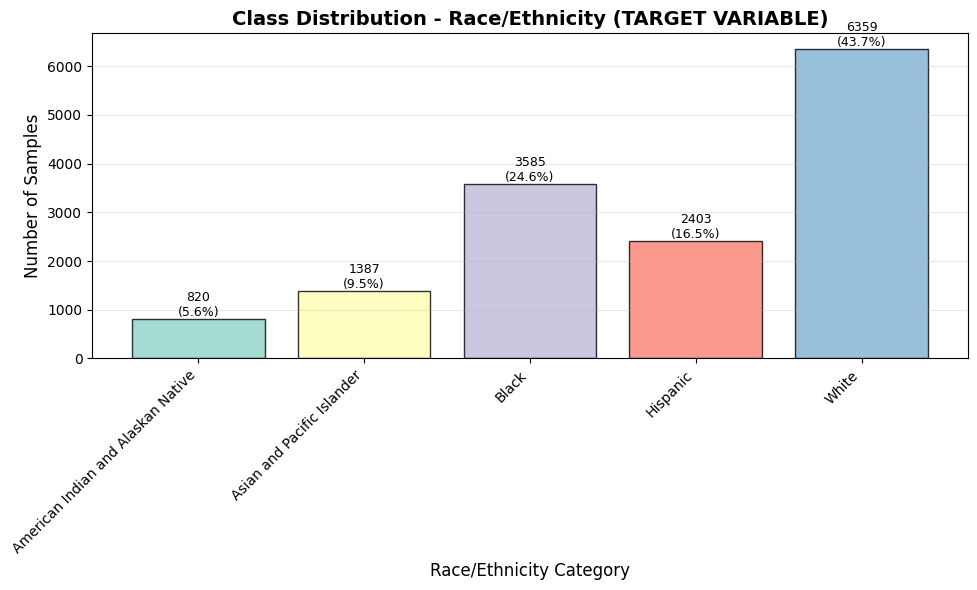

In [14]:
# Visualize class imbalance
plt.figure(figsize=(10, 6))

colors = plt.cm.Set3(range(len(class_names)))
bars = plt.bar(range(len(class_names)), class_counts.values, color=colors, alpha=0.8, edgecolor='black')

plt.xlabel('Race/Ethnicity Category', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Class Distribution - Race/Ethnicity (TARGET VARIABLE)', fontsize=14, fontweight='bold')
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({(height/len(df_encoded)*100):.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 4.8 ANTI-LEAKAGE: Export Cleaned Dataset

In [15]:
# CRITICAL: Export cleaned dataset BEFORE splitting
print("=" * 80)
print("EXPORTING CLEANED DATASET (ANTI-LEAKAGE MEASURE)")
print("=" * 80)

# Prepare final cleaned dataset
output_path = '/content/drive/MyDrive/Ai/FinalAssessment/Heart_Disease_Cleaned_Classification.csv'

# Save to CSV
df_encoded.to_csv(output_path, index=False)

print(f"\n✓ Cleaned dataset exported successfully!")
print(f"Location: {output_path}")
print(f"Shape: {df_encoded.shape}")
print(f"\nThis ensures NO DATA LEAKAGE between train/test splits.")

EXPORTING CLEANED DATASET (ANTI-LEAKAGE MEASURE)

✓ Cleaned dataset exported successfully!
Location: /content/drive/MyDrive/Ai/FinalAssessment/Heart_Disease_Cleaned_Classification.csv
Shape: (14554, 12)

This ensures NO DATA LEAKAGE between train/test splits.


---
## Step 5: Exploratory Data Analysis (EDA)

In [16]:
# Summary statistics by race/ethnicity
print("=" * 80)
print("MORTALITY RATE BY RACE/ETHNICITY")
print("=" * 80)

print(df_work.groupby('Race_Ethnicity')['Mortality_Rate'].describe())

MORTALITY RATE BY RACE/ETHNICITY
                                     count        mean         std   min  \
Race_Ethnicity                                                             
American Indian and Alaskan Native   820.0  426.846341  247.308347  16.2   
Asian and Pacific Islander          1387.0  172.332012   70.567014   0.2   
Black                               3585.0  455.395732  169.765494  37.4   
Hispanic                            2403.0  214.599168  101.881992   0.0   
White                               6359.0  365.525035  124.662205  10.7   

                                       25%    50%      75%     max  
Race_Ethnicity                                                      
American Indian and Alaskan Native  251.00  377.2  544.925  2030.5  
Asian and Pacific Islander          121.05  162.1  205.450   807.7  
Black                               329.50  422.7  553.400  2312.1  
Hispanic                            141.60  193.5  264.150   944.7  
White               

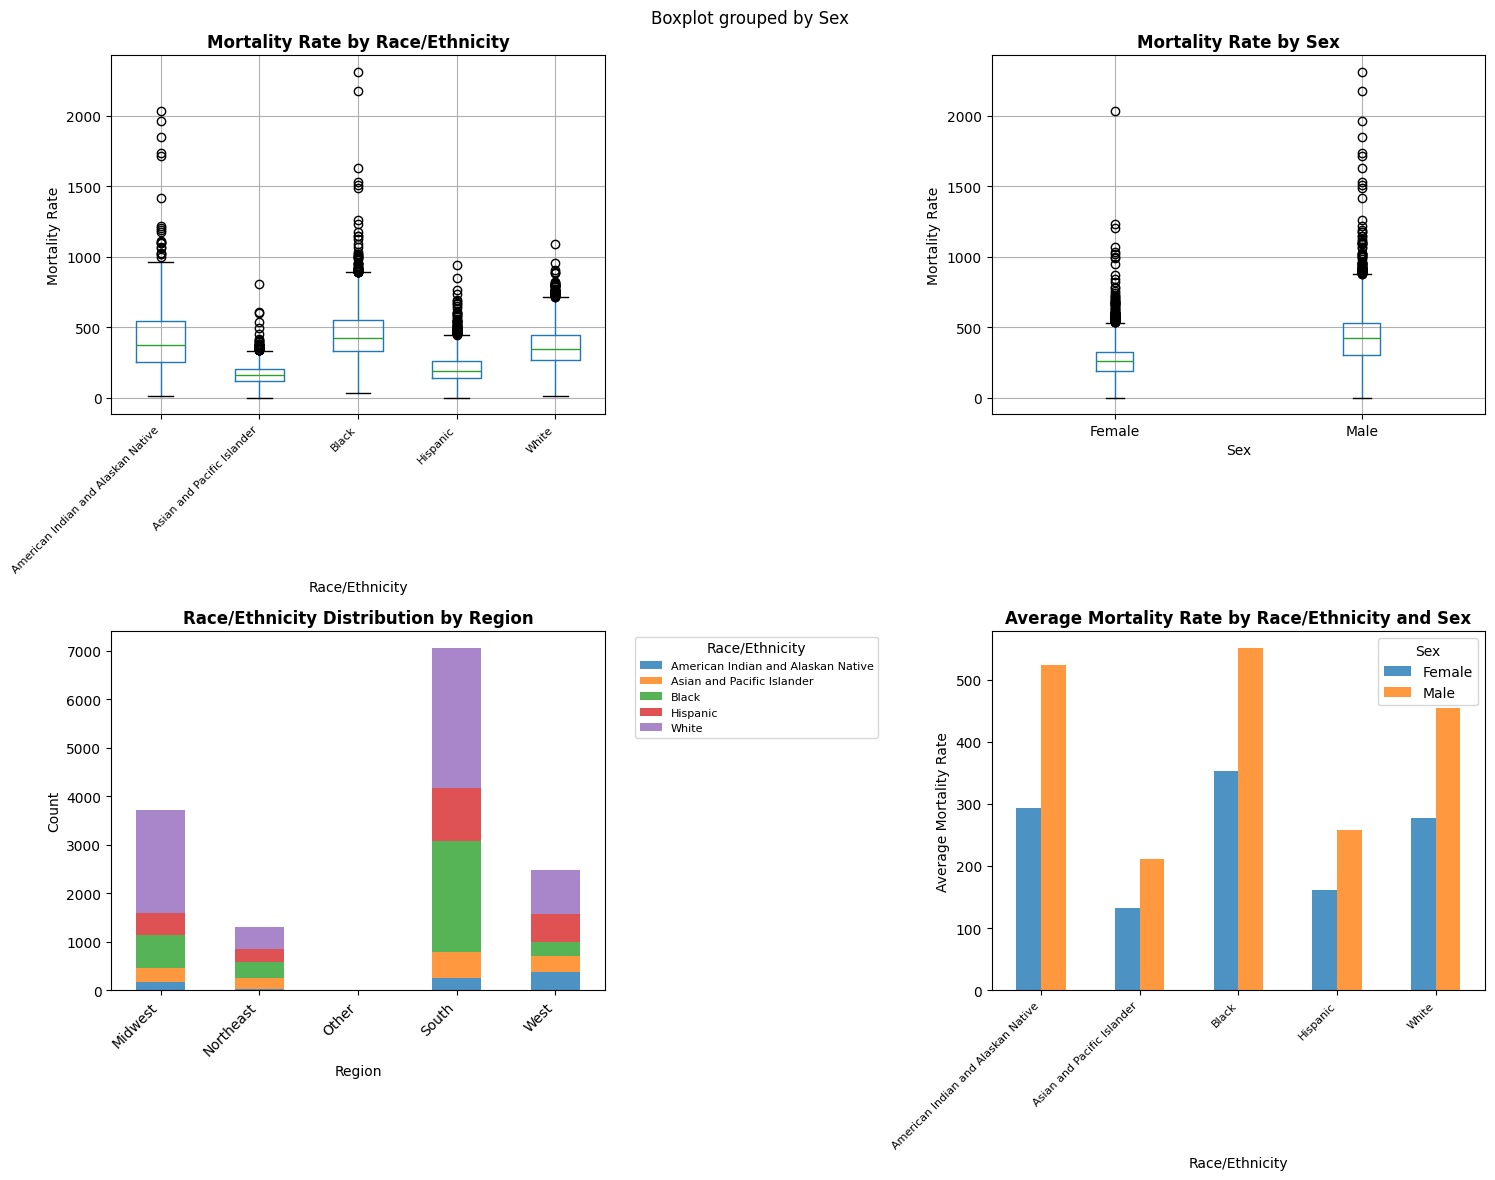

In [17]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Mortality Rate by Race/Ethnicity (Box Plot)
df_work.boxplot(column='Mortality_Rate', by='Race_Ethnicity', ax=axes[0, 0])
axes[0, 0].set_title('Mortality Rate by Race/Ethnicity', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Race/Ethnicity', fontsize=10)
axes[0, 0].set_ylabel('Mortality Rate', fontsize=10)
plt.sca(axes[0, 0])
plt.xticks(rotation=45, ha='right', fontsize=8)

# 2. Mortality Rate by Sex
df_work.boxplot(column='Mortality_Rate', by='Sex', ax=axes[0, 1])
axes[0, 1].set_title('Mortality Rate by Sex', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sex', fontsize=10)
axes[0, 1].set_ylabel('Mortality Rate', fontsize=10)

# 3. Race/Ethnicity by Region
race_region_counts = pd.crosstab(df_work['Region'], df_work['Race_Ethnicity'])
race_region_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], alpha=0.8)
axes[1, 0].set_title('Race/Ethnicity Distribution by Region', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Region', fontsize=10)
axes[1, 0].set_ylabel('Count', fontsize=10)
axes[1, 0].legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right')

# 4. Average Mortality by Race and Sex
mortality_by_race_sex = df_work.groupby(['Race_Ethnicity', 'Sex'])['Mortality_Rate'].mean().unstack()
mortality_by_race_sex.plot(kind='bar', ax=axes[1, 1], alpha=0.8)
axes[1, 1].set_title('Average Mortality Rate by Race/Ethnicity and Sex', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Race/Ethnicity', fontsize=10)
axes[1, 1].set_ylabel('Average Mortality Rate', fontsize=10)
axes[1, 1].legend(title='Sex')
plt.sca(axes[1, 1])
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

---
## Step 6: Prepare Data for Modeling

In [18]:
# Prepare features and target
print("=" * 80)
print("PREPARING DATA FOR CLASSIFICATION MODELING")
print("=" * 80)

# Features: Year, State, Region, Sex, Mortality_Rate (all numerical)
feature_columns = ['Year', 'State_Encoded', 'Region_Encoded', 'Sex_Encoded', 'Mortality_Rate']
X = df_encoded[feature_columns].values
y = df_encoded['Race_Encoded'].values

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature list: {feature_columns}")
print(f"Target: Race_Ethnicity ({len(np.unique(y))} classes)")

PREPARING DATA FOR CLASSIFICATION MODELING

Features (X) shape: (14554, 5)
Target (y) shape: (14554,)

Feature list: ['Year', 'State_Encoded', 'Region_Encoded', 'Sex_Encoded', 'Mortality_Rate']
Target: Race_Ethnicity (5 classes)


In [19]:
# Train-test split with stratification (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({(len(X_train)/len(X)*100):.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({(len(X_test)/len(X)*100):.1f}%)")

# Verify stratification
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nClass distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())

Training set: 11643 samples (80.0%)
Testing set: 2911 samples (20.0%)

Class distribution in training set:
0     656
1    1110
2    2868
3    1922
4    5087
Name: count, dtype: int64

Class distribution in test set:
0     164
1     277
2     717
3     481
4    1272
Name: count, dtype: int64


In [20]:
# Feature scaling (for KNN and Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

✓ Features scaled using StandardScaler


---
## Step 7: Model 1 - K-Nearest Neighbors (KNN)

In [21]:
print("=" * 80)
print("MODEL 1: K-NEAREST NEIGHBORS (KNN)")
print("=" * 80)

# Train KNN classifier (using scaled features)
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Calculate metrics
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
train_prec_knn = precision_score(y_train, y_train_pred_knn, average='weighted', zero_division=0)
train_rec_knn = recall_score(y_train, y_train_pred_knn, average='weighted', zero_division=0)
train_f1_knn = f1_score(y_train, y_train_pred_knn, average='weighted', zero_division=0)

test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
test_prec_knn = precision_score(y_test, y_test_pred_knn, average='weighted', zero_division=0)
test_rec_knn = recall_score(y_test, y_test_pred_knn, average='weighted', zero_division=0)
test_f1_knn = f1_score(y_test, y_test_pred_knn, average='weighted', zero_division=0)

print("\nTRAINING SET PERFORMANCE:")
print(f"  Accuracy:  {train_acc_knn:.4f}")
print(f"  Precision: {train_prec_knn:.4f}")
print(f"  Recall:    {train_rec_knn:.4f}")
print(f"  F1-Score:  {train_f1_knn:.4f}")

print("\nTEST SET PERFORMANCE:")
print(f"  Accuracy:  {test_acc_knn:.4f}")
print(f"  Precision: {test_prec_knn:.4f}")
print(f"  Recall:    {test_rec_knn:.4f}")
print(f"  F1-Score:  {test_f1_knn:.4f}")

MODEL 1: K-NEAREST NEIGHBORS (KNN)

TRAINING SET PERFORMANCE:
  Accuracy:  0.7355
  Precision: 0.7332
  Recall:    0.7355
  F1-Score:  0.7339

TEST SET PERFORMANCE:
  Accuracy:  0.6245
  Precision: 0.6216
  Recall:    0.6245
  F1-Score:  0.6220


---
## Step 8: Model 2 - Random Forest with Class Imbalance Handling

In [22]:
print("=" * 80)
print("MODEL 2: RANDOM FOREST CLASSIFIER (WITH CLASS BALANCING)")
print("=" * 80)

# CRITICAL: Use class_weight='balanced' to handle imbalance
print("\nUsing class_weight='balanced' to handle class imbalance...")

rf_initial = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # HANDLES CLASS IMBALANCE
    random_state=42,
    n_jobs=-1
)
rf_initial.fit(X_train, y_train)

# Predictions (initial)
y_test_pred_rf_init = rf_initial.predict(X_test)

print("\nInitial Random Forest Performance:")
print(f"  Test Accuracy:  {accuracy_score(y_test, y_test_pred_rf_init):.4f}")
print(f"  Test Precision: {precision_score(y_test, y_test_pred_rf_init, average='weighted', zero_division=0):.4f}")
print(f"  Test Recall:    {recall_score(y_test, y_test_pred_rf_init, average='weighted', zero_division=0):.4f}")
print(f"  Test F1-Score:  {f1_score(y_test, y_test_pred_rf_init, average='weighted', zero_division=0):.4f}")

MODEL 2: RANDOM FOREST CLASSIFIER (WITH CLASS BALANCING)

Using class_weight='balanced' to handle class imbalance...

Initial Random Forest Performance:
  Test Accuracy:  0.5902
  Test Precision: 0.5887
  Test Recall:    0.5902
  Test F1-Score:  0.5890


In [23]:
# GridSearchCV for hyperparameter tuning
print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION WITH GRIDSEARCHCV")
print("=" * 80)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("\nParameter Grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print("\nPerforming Grid Search with 5-Fold Cross-Validation...")
print("This may take a few minutes...\n")

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n" + "=" * 80)
print("GRID SEARCH RESULTS")
print("=" * 80)
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV F1-Score: {grid_search.best_score_:.4f}")

# Best Random Forest model
rf_best = grid_search.best_estimator_


HYPERPARAMETER OPTIMIZATION WITH GRIDSEARCHCV

Parameter Grid:
  n_estimators: [100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 2]

Performing Grid Search with 5-Fold Cross-Validation...
This may take a few minutes...

Fitting 5 folds for each of 24 candidates, totalling 120 fits

GRID SEARCH RESULTS

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV F1-Score: 0.6112


In [24]:
# Evaluate optimized Random Forest
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
train_prec_rf = precision_score(y_train, y_train_pred_rf, average='weighted', zero_division=0)
train_rec_rf = recall_score(y_train, y_train_pred_rf, average='weighted', zero_division=0)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted', zero_division=0)

test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_prec_rf = precision_score(y_test, y_test_pred_rf, average='weighted', zero_division=0)
test_rec_rf = recall_score(y_test, y_test_pred_rf, average='weighted', zero_division=0)
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted', zero_division=0)

print("\nOPTIMIZED RANDOM FOREST PERFORMANCE:")
print("\nTraining Set:")
print(f"  Accuracy:  {train_acc_rf:.4f}")
print(f"  Precision: {train_prec_rf:.4f}")
print(f"  Recall:    {train_rec_rf:.4f}")
print(f"  F1-Score:  {train_f1_rf:.4f}")

print("\nTest Set:")
print(f"  Accuracy:  {test_acc_rf:.4f}")
print(f"  Precision: {test_prec_rf:.4f}")
print(f"  Recall:    {test_rec_rf:.4f}")
print(f"  F1-Score:  {test_f1_rf:.4f}")

# Feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.to_string(index=False))


OPTIMIZED RANDOM FOREST PERFORMANCE:

Training Set:
  Accuracy:  0.6851
  Precision: 0.7109
  Recall:    0.6851
  F1-Score:  0.6886

Test Set:
  Accuracy:  0.6098
  Precision: 0.6397
  Recall:    0.6098
  F1-Score:  0.6166

Feature Importance:
       Feature  Importance
Mortality_Rate    0.645519
 State_Encoded    0.206570
Region_Encoded    0.092674
   Sex_Encoded    0.055238
          Year    0.000000


---
## Step 9: Model 3 - Neural Network (MLP) with TensorFlow/Keras

### Neural Network Architecture for Multi-Class Classification

**Multi-Layer Perceptron (MLP) Classifier:**

- **Input Layer:** 5 features (Year, State, Region, Sex, Mortality_Rate)
- **Hidden Layer 1:** 64 neurons, ReLU activation
- **Dropout Layer 1:** 30% dropout rate (regularization)
- **Hidden Layer 2:** 32 neurons, ReLU activation
- **Dropout Layer 2:** 30% dropout rate
- **Hidden Layer 3:** 16 neurons, ReLU activation
- **Output Layer:** 6 neurons (one for each race/ethnicity class), **Softmax activation** (for probability distribution over classes)

**Optimizer:** Adam (learning rate = 0.001)  
**Loss Function:** Sparse Categorical Cross-Entropy (for integer labels)  
**Class Weights:** Computed to handle class imbalance  
**Metrics:** Accuracy  
**Early Stopping:** Patience = 15 epochs on validation loss

In [25]:
print("=" * 80)
print("MODEL 3: NEURAL NETWORK (MLP) CLASSIFIER")
print("=" * 80)

# Calculate class weights for handling imbalance
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

print("\nClass Weights (to handle imbalance):")
for class_idx, weight in class_weight_dict.items():
    print(f"  {le_race.classes_[class_idx]}: {weight:.4f}")

# Number of classes
num_classes = len(np.unique(y))
print(f"\nNumber of classes: {num_classes}")

MODEL 3: NEURAL NETWORK (MLP) CLASSIFIER

Class Weights (to handle imbalance):
  American Indian and Alaskan Native: 3.5497
  Asian and Pacific Islander: 2.0978
  Black: 0.8119
  Hispanic: 1.2116
  White: 0.4578

Number of classes: 5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [26]:
# Build Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), name='hidden_1'),
    Dropout(0.3, name='dropout_1'),
    Dense(32, activation='relu', name='hidden_2'),
    Dropout(0.3, name='dropout_2'),
    Dense(16, activation='relu', name='hidden_3'),
    Dense(num_classes, activation='softmax', name='output')  # Softmax for multi-class
], name='MLP_Classifier')

# Compile
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nNeural Network Architecture:")
nn_model.summary()


Neural Network Architecture:


Model: "MLP_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 3,077 (12.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train Neural Network with class weights
print("\nTraining Neural Network with class weights...")

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,  # Handle class imbalance
    callbacks=[early_stop],
    verbose=1
)

print("\n✓ Training completed!")


Training Neural Network with class weights...
Epoch 1/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2358 - loss: 1.5483 - val_accuracy: 0.3942 - val_loss: 1.3168
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3914 - loss: 1.2649 - val_accuracy: 0.4397 - val_loss: 1.2429
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4338 - loss: 1.2217 - val_accuracy: 0.4586 - val_loss: 1.2007
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4559 - loss: 1.1912 - val_accuracy: 0.4813 - val_loss: 1.1728
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4747 - loss: 1.1783 - val_accuracy: 0.4749 - val_loss: 1.1572
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4823 - loss: 1.1616 - val_accuracy: 0.4968 - val_loss: 1.1330
Epoch 7/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4941 - loss: 1.1517 - val_accuracy: 0.4985 - val_loss: 1.1231
Epoch 8/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

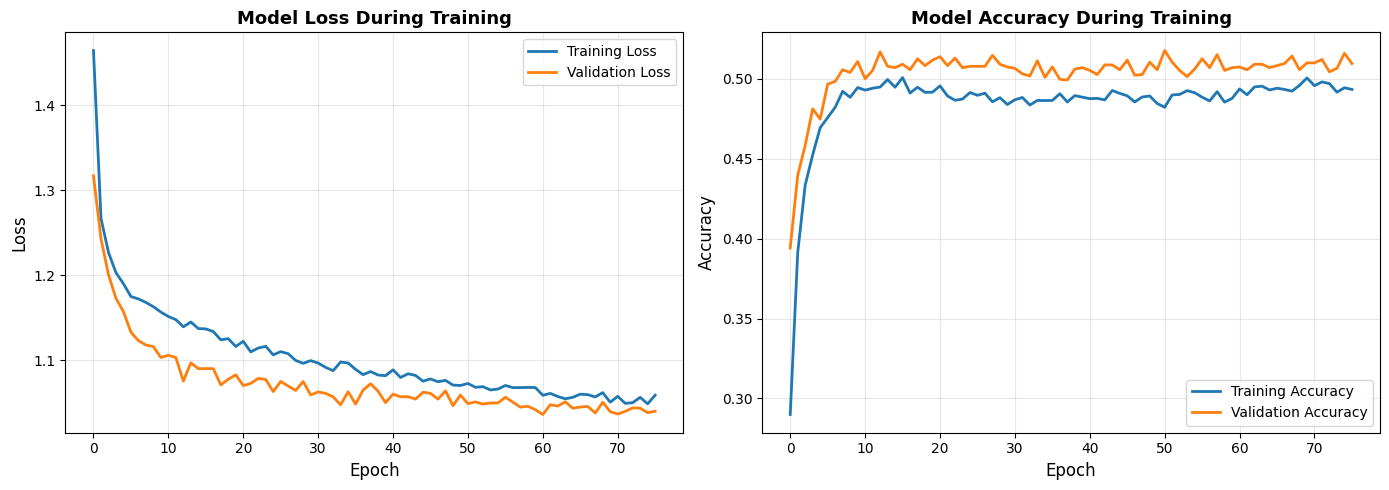

In [28]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Model Loss During Training', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Model Accuracy During Training', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Evaluate Neural Network
y_train_pred_nn = np.argmax(nn_model.predict(X_train_scaled, verbose=0), axis=1)
y_test_pred_nn = np.argmax(nn_model.predict(X_test_scaled, verbose=0), axis=1)

train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
train_prec_nn = precision_score(y_train, y_train_pred_nn, average='weighted', zero_division=0)
train_rec_nn = recall_score(y_train, y_train_pred_nn, average='weighted', zero_division=0)
train_f1_nn = f1_score(y_train, y_train_pred_nn, average='weighted', zero_division=0)

test_acc_nn = accuracy_score(y_test, y_test_pred_nn)
test_prec_nn = precision_score(y_test, y_test_pred_nn, average='weighted', zero_division=0)
test_rec_nn = recall_score(y_test, y_test_pred_nn, average='weighted', zero_division=0)
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='weighted', zero_division=0)

print("=" * 80)
print("NEURAL NETWORK PERFORMANCE")
print("=" * 80)

print("\nTraining Set:")
print(f"  Accuracy:  {train_acc_nn:.4f}")
print(f"  Precision: {train_prec_nn:.4f}")
print(f"  Recall:    {train_rec_nn:.4f}")
print(f"  F1-Score:  {train_f1_nn:.4f}")

print("\nTest Set:")
print(f"  Accuracy:  {test_acc_nn:.4f}")
print(f"  Precision: {test_prec_nn:.4f}")
print(f"  Recall:    {test_rec_nn:.4f}")
print(f"  F1-Score:  {test_f1_nn:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred_nn,
                          target_names=le_race.classes_,
                          zero_division=0))

NEURAL NETWORK PERFORMANCE

Training Set:
  Accuracy:  0.5157
  Precision: 0.5894
  Recall:    0.5157
  F1-Score:  0.5168

Test Set:
  Accuracy:  0.5026
  Precision: 0.5810
  Recall:    0.5026
  F1-Score:  0.5051

Detailed Classification Report:
                                    precision    recall  f1-score   support

American Indian and Alaskan Native       0.21      0.61      0.32       164
        Asian and Pacific Islander       0.41      0.83      0.55       277
                             Black       0.51      0.63      0.56       717
                          Hispanic       0.47      0.23      0.31       481
                             White       0.75      0.45      0.56      1272

                          accuracy                           0.50      2911
                         macro avg       0.47      0.55      0.46      2911
                      weighted avg       0.58      0.50      0.51      2911



---
## Step 10: Feature Selection with SelectKBest

In [30]:
print("=" * 80)
print("FEATURE SELECTION WITH SELECTKBEST")
print("=" * 80)

# Apply SelectKBest
k_best = 4  # Select top 4 features

selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_columns,
    'Score': selector.scores_,
    'Selected': selector.get_support()
}).sort_values('Score', ascending=False)

print(f"\nFeature Selection Method: SelectKBest (k={k_best})")
print(f"Scoring Function: f_classif (ANOVA F-statistic)")
print("\nFeature Scores:")
print(feature_scores.to_string(index=False))

selected_features = feature_scores[feature_scores['Selected']]['Feature'].tolist()
print(f"\n✓ Selected Features: {selected_features}")

FEATURE SELECTION WITH SELECTKBEST

Feature Selection Method: SelectKBest (k=4)
Scoring Function: f_classif (ANOVA F-statistic)

Feature Scores:
       Feature       Score  Selected
Mortality_Rate 1387.025800      True
Region_Encoded   66.172027      True
   Sex_Encoded    7.246471      True
 State_Encoded    7.005653      True
          Year         NaN     False

✓ Selected Features: ['Mortality_Rate', 'Region_Encoded', 'Sex_Encoded', 'State_Encoded']


---
## Step 11: Final Model Comparison

In [31]:
print("=" * 80)
print("FINAL MODEL COMPARISON - CLASSIFICATION TASK")
print("=" * 80)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Random Forest (Balanced)', 'Neural Network (MLP)'],
    'Accuracy': [test_acc_knn, test_acc_rf, test_acc_nn],
    'Precision': [test_prec_knn, test_prec_rf, test_prec_nn],
    'Recall': [test_rec_knn, test_rec_rf, test_rec_nn],
    'F1-Score': [test_f1_knn, test_f1_rf, test_f1_nn]
})

print("\n")
print(comparison_df.to_string(index=False))

# Determine best model
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

print(f"\n{'='*80}")
print(f"BEST PERFORMING MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"\nAccuracy:  {comparison_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"Precision: {comparison_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"Recall:    {comparison_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"F1-Score:  {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")

FINAL MODEL COMPARISON - CLASSIFICATION TASK


                   Model  Accuracy  Precision   Recall  F1-Score
     K-Nearest Neighbors  0.624528   0.621635 0.624528  0.621977
Random Forest (Balanced)  0.609756   0.639665 0.609756  0.616594
    Neural Network (MLP)  0.502576   0.581014 0.502576  0.505084

BEST PERFORMING MODEL: K-Nearest Neighbors

Accuracy:  0.6245
Precision: 0.6216
Recall:    0.6245
F1-Score:  0.6220


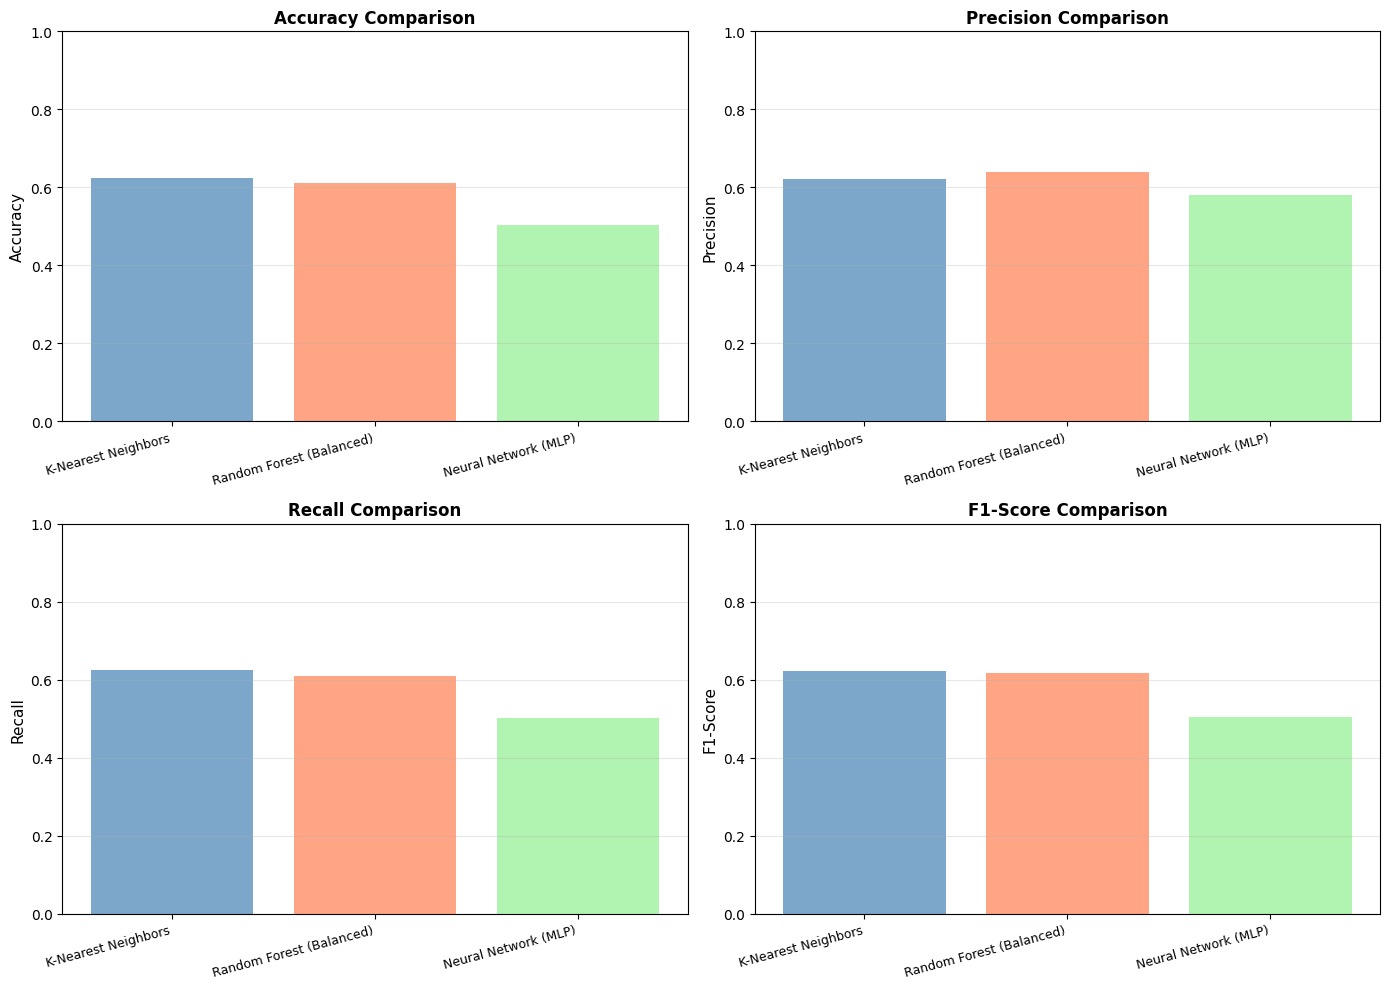

In [32]:
# Visualization: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models = comparison_df['Model'].values
colors = ['steelblue', 'coral', 'lightgreen']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
axes_flat = axes.flatten()

for idx, metric in enumerate(metrics):
    axes_flat[idx].bar(range(len(models)), comparison_df[metric], color=colors, alpha=0.7)
    axes_flat[idx].set_xticks(range(len(models)))
    axes_flat[idx].set_xticklabels(models, rotation=15, ha='right', fontsize=9)
    axes_flat[idx].set_ylabel(metric, fontsize=11)
    axes_flat[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes_flat[idx].grid(axis='y', alpha=0.3)
    axes_flat[idx].set_ylim([0, 1])

plt.tight_layout()
plt.show()

---
## Step 12: Confusion Matrix Analysis

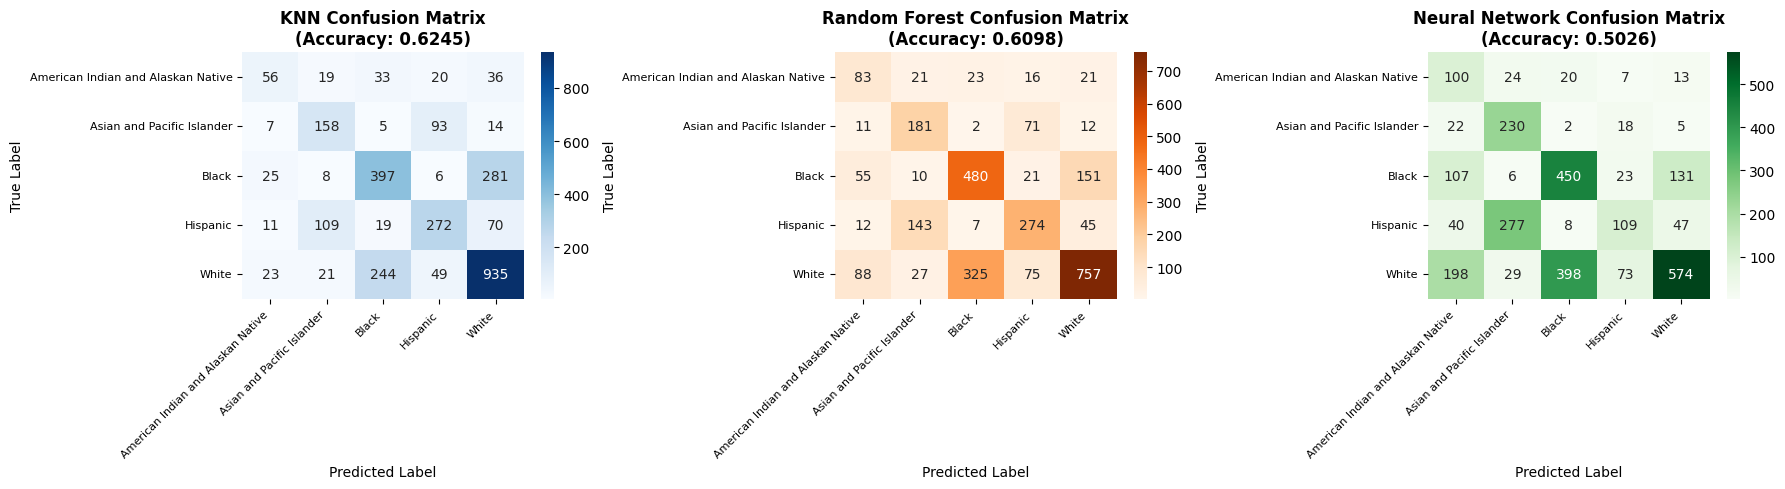

In [33]:
# Confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_race.classes_, yticklabels=le_race.classes_)
axes[0].set_title(f'KNN Confusion Matrix\n(Accuracy: {test_acc_knn:.4f})',
                 fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=10)
axes[0].set_xlabel('Predicted Label', fontsize=10)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(axes[0].get_yticklabels(), fontsize=8)

# Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=le_race.classes_, yticklabels=le_race.classes_)
axes[1].set_title(f'Random Forest Confusion Matrix\n(Accuracy: {test_acc_rf:.4f})',
                 fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=10)
axes[1].set_xlabel('Predicted Label', fontsize=10)
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(axes[1].get_yticklabels(), fontsize=8)

# Neural Network
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', ax=axes[2],
            xticklabels=le_race.classes_, yticklabels=le_race.classes_)
axes[2].set_title(f'Neural Network Confusion Matrix\n(Accuracy: {test_acc_nn:.4f})',
                 fontsize=12, fontweight='bold')
axes[2].set_ylabel('True Label', fontsize=10)
axes[2].set_xlabel('Predicted Label', fontsize=10)
plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(axes[2].get_yticklabels(), fontsize=8)

plt.tight_layout()
plt.show()

---
## End of Classification Task

**Student:** Pranjal Khanal (2501416)  
**Date:** 10th February 2026